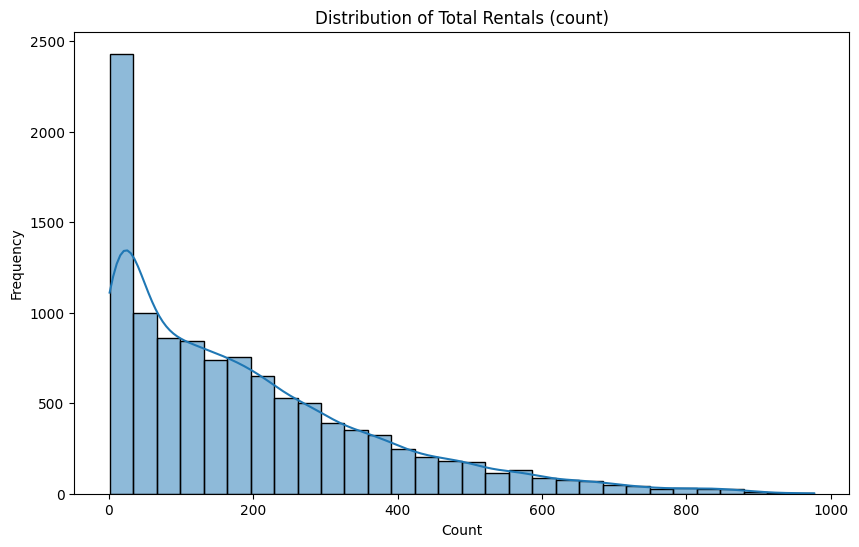

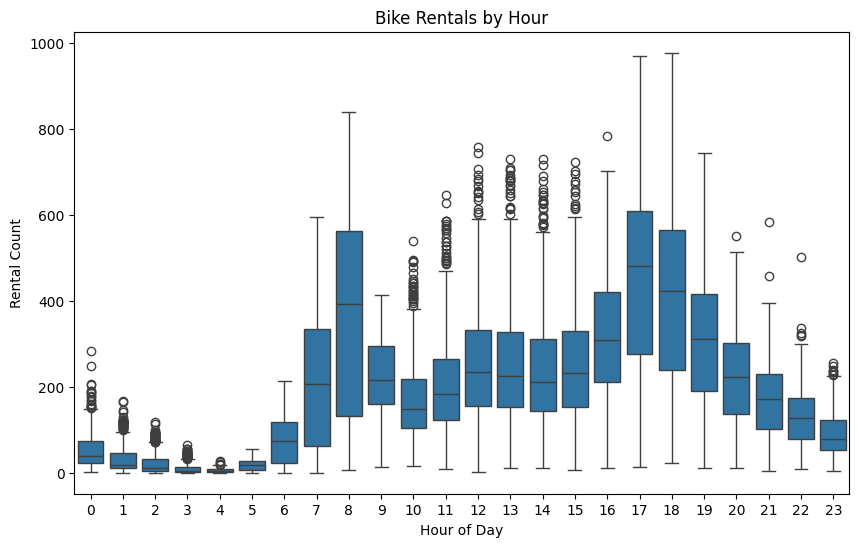

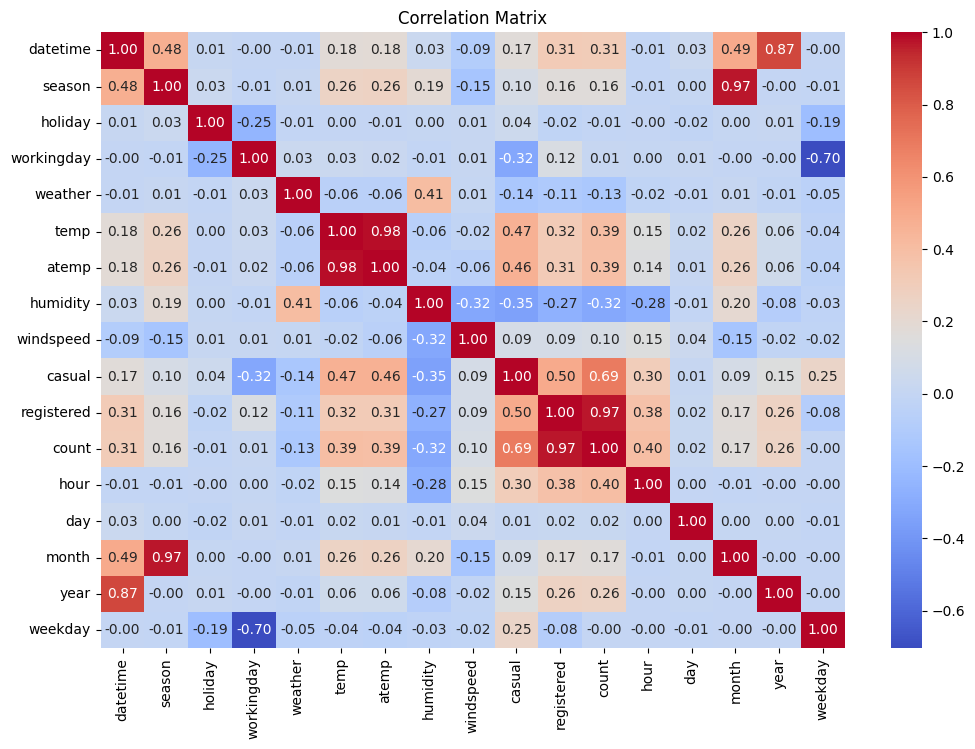

Missing values:
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
hour          0
day           0
month         0
year          0
weekday       0
dtype: int64


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
train_data = pd.read_csv("/workspaces/ZOOCAMP_Mike_regration/ZOOCAMP_Mike_regration/data/raw/train_bikes.csv")

# Convert datetime to pandas datetime
train_data['datetime'] = pd.to_datetime(train_data['datetime'])

# Extract new features from datetime
train_data['hour'] = train_data['datetime'].dt.hour
train_data['day'] = train_data['datetime'].dt.day
train_data['month'] = train_data['datetime'].dt.month
train_data['year'] = train_data['datetime'].dt.year
train_data['weekday'] = train_data['datetime'].dt.weekday

# Plot distribution of target variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['count'], bins=30, kde=True)
plt.title("Distribution of Total Rentals (count)")
plt.xlabel("Count")
plt.ylabel("Frequency")
plt.show()

# Analyze usage by hour
plt.figure(figsize=(10, 6))
sns.boxplot(x='hour', y='count', data=train_data)
plt.title("Bike Rentals by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Rental Count")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Missing values
missing_values = train_data.isnull().sum()
print("Missing values:\n", missing_values)


Average bike rentals per season:
season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


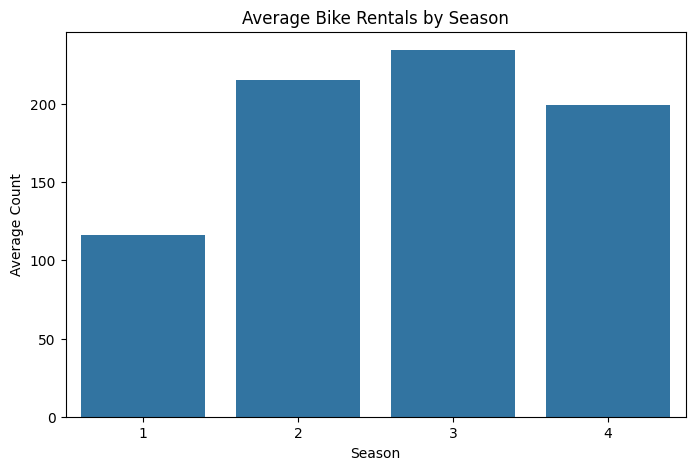

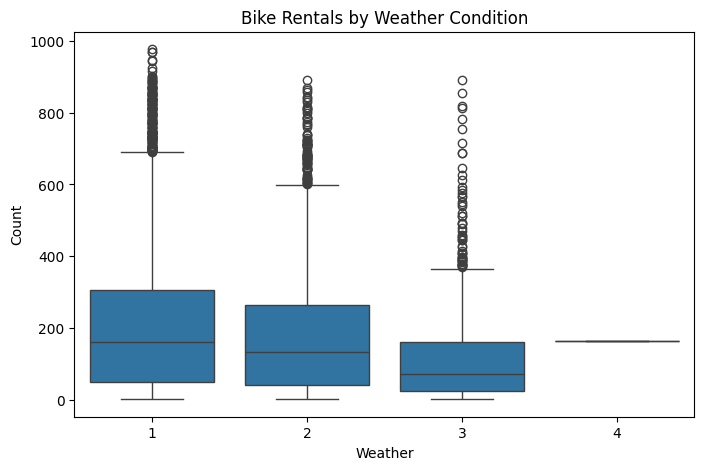

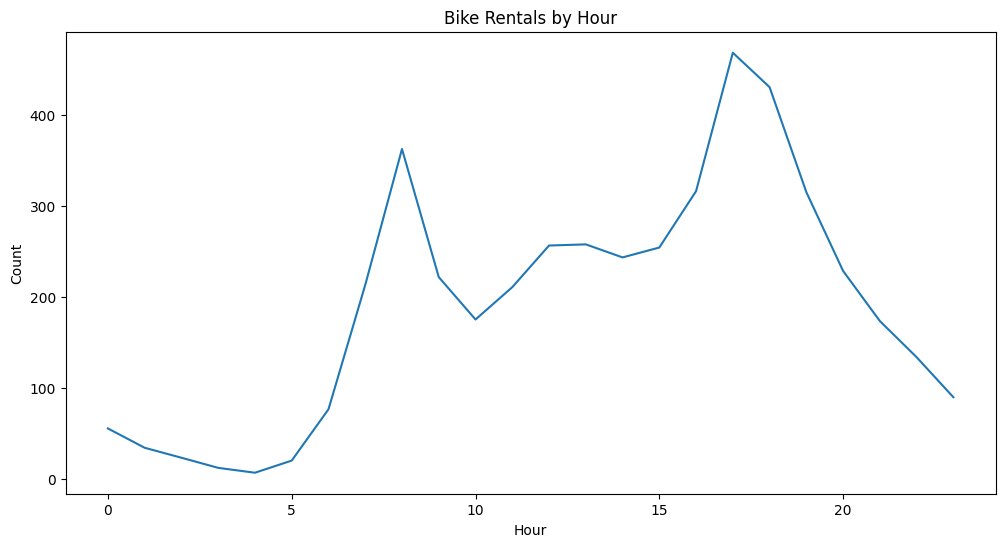

In [4]:
# Group data by season and calculate average count
season_data = train_data.groupby('season')['count'].mean()
print("Average bike rentals per season:")
print(season_data)

# Plot rentals by season
plt.figure(figsize=(8, 5))
sns.barplot(x=season_data.index, y=season_data.values)
plt.title("Average Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Count")
plt.show()

# Analyze bike rentals by weather condition
plt.figure(figsize=(8, 5))
sns.boxplot(x='weather', y='count', data=train_data)
plt.title("Bike Rentals by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.show()

# Analyze bike rentals by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=train_data, errorbar=None)
plt.title("Bike Rentals by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()
